<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/lcapy_install_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#相關程式庫安裝

In [ ]:
!apt update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,035 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,370 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/

In [ ]:
!apt upgrade

In [ ]:
!apt install imagemagick

In [ ]:
!apt install pdf2svg

In [ ]:
!apt install texlive texlive-latex-extra

In [ ]:
!pip install pdflatex

In [ ]:
!sudo apt-get install texlive-latex-recommended

In [ ]:
!sudo apt install dvipng

#安裝lcapy程式庫

In [ ]:
!pip install lcapy

##範例一：串聯電阻$R_1$和$R_2$再與電池$V_1$串聯

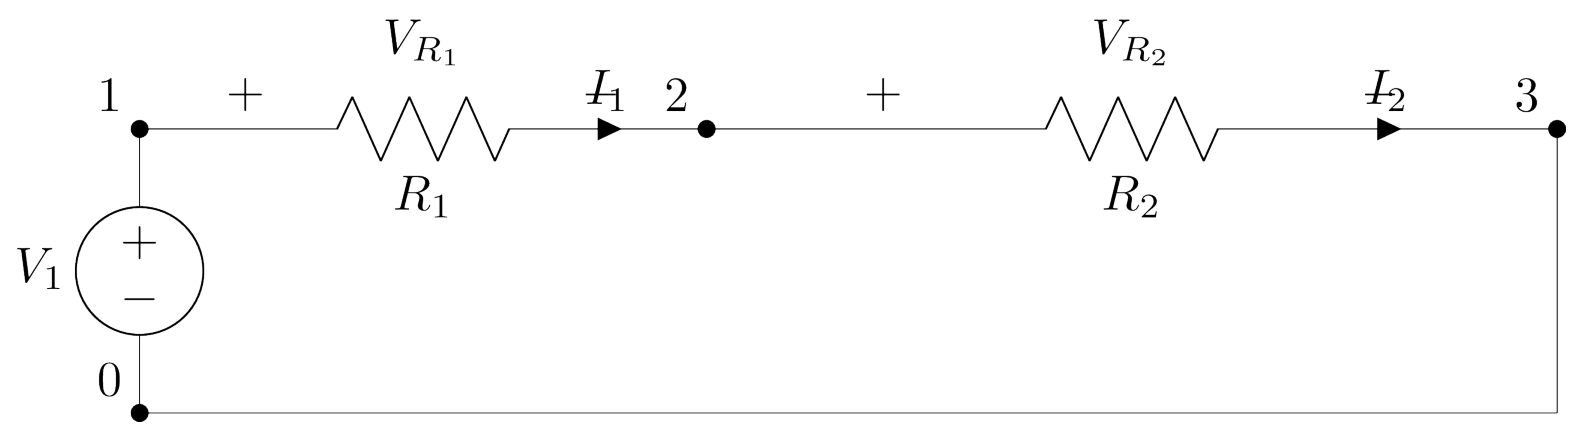

In [ ]:
from lcapy import Circuit
cct = Circuit("""
V1 1 0; down
R1 1 2; right=2, i=I_1, v=V_{R_1}
R2 2 3; right=3, i=I_2, v=V_{R_2}
W 3 0_3; down
W 0_3 0; left""")
cct.draw(scale=2, svg=True)

In [ ]:
l=cct.mesh_analysis()

In [ ]:
l.mesh_equations()

{I₁: -I₁⋅R₁ - I₁⋅R₂ + V₁ = 0}

In [ ]:
l.matrix_equations()

                 -1      
[I₁] = [-R₁ - R₂]  ⋅[-V₁]

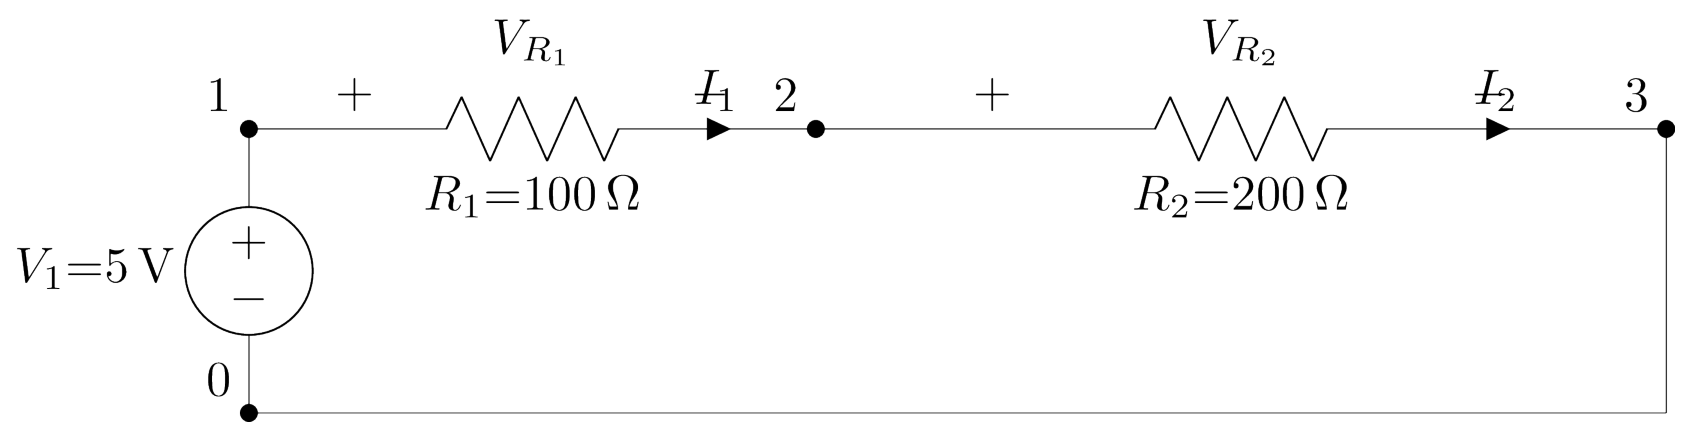

In [ ]:
from lcapy import Circuit
cct1 = Circuit("""
V1 1 0 5.0; down
R1 1 2 1E2; right=2, i=I_1, v=V_{R_1}
R2 2 3 2E2; right=3, i=I_2, v=V_{R_2}
W 3 0_3; down
W 0_3 0; left""")
cct1.draw(scale=2)

In [ ]:
from lcapy import Circuit
cct2 = Circuit("""
V 1 0 {10*u(t)}; down
R 1 2 1E3; right=2, i=I, v=V_{R}
C 2 0_1 1E-3; down, i=I, v=V_{C}
W 0 0_1; right""")

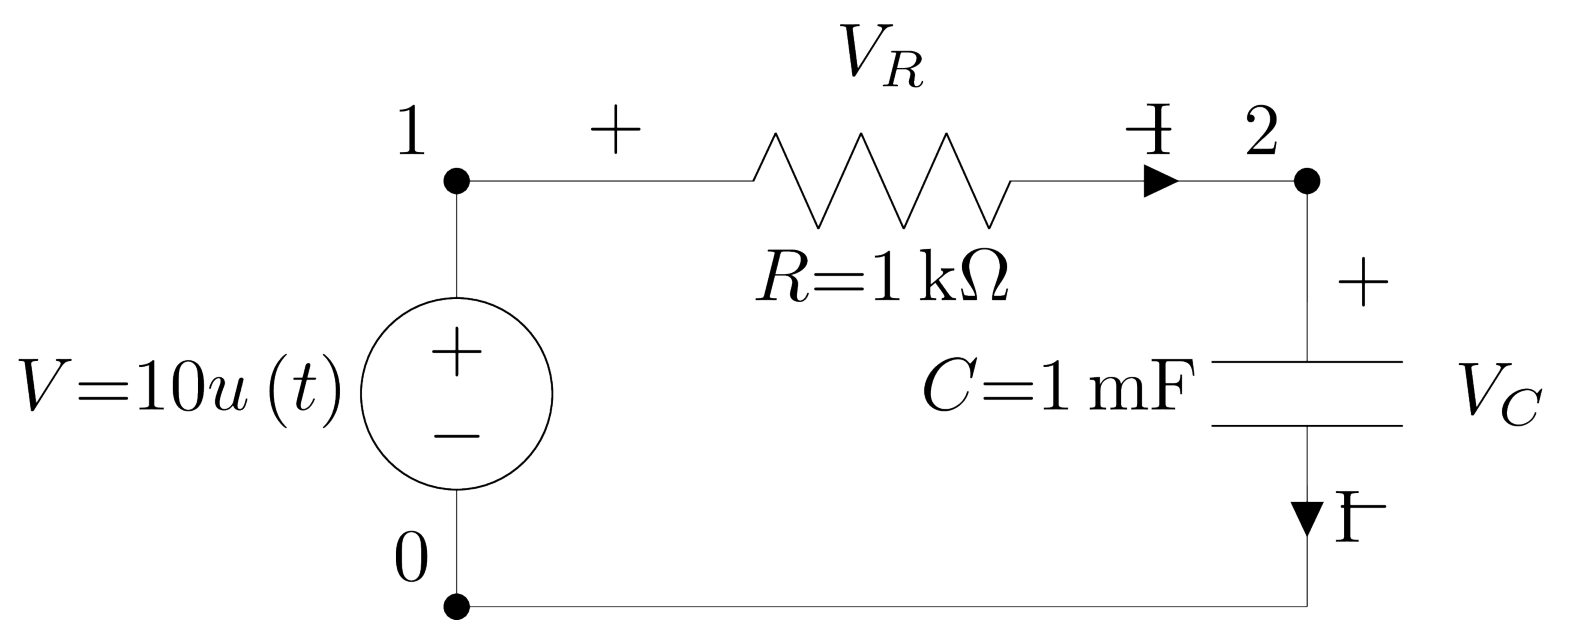

In [ ]:
cct2.draw(scale=3)

In [ ]:
na2=cct2.nodal_analysis()

In [ ]:
na2.nodal_equations()

⎧                                         d            ⎫
⎪                                         ──(v₂(t))    ⎪
⎨                         v₁(t)   v₂(t)   dt           ⎬
⎪1: v₁(t) = 10⋅u(t), 2: - ───── + ───── + ───────── = 0⎪
⎩                          1000    1000      1000      ⎭

In [ ]:
na3 = cct2.laplace().nodal_analysis()
na3.nodal_equations()

⎧           10     s⋅V₂(s)   V₁(s)   V₂(s)    ⎫
⎨1: V₁(s) = ──, 2: ─────── - ───── + ───── = 0⎬
⎩           s        1000     1000    1000    ⎭

In [ ]:
na3.matrix_equations()

                                -1     
          ⎡   1          0     ⎤   ⎡10⎤
⎡V₁(s)⎤   ⎢                    ⎥   ⎢──⎥
⎢     ⎥ = ⎢          s      1  ⎥  ⋅⎢s ⎥
⎣V₂(s)⎦   ⎢-1/1000  ──── + ────⎥   ⎢  ⎥
          ⎣         1000   1000⎦   ⎣0 ⎦

In [ ]:
la = cct2.loop_analysis()
la.mesh_equations()

⎧                                    t               ⎫
⎪                                    ⌠               ⎪
⎨i₁(t): -1000⋅i₁(t) + 10⋅u(t) + 1000⋅⎮  -i₁(τ) dτ = 0⎬
⎪                                    ⌡               ⎪
⎩                                    -∞              ⎭

In [ ]:
ss = cct2.state_space()
ss.state_equations()

⎡d         ⎤                                
⎢──(v_C(t))⎥ = [-1]⋅[v_C(t)] + [1]⋅[10⋅u(t)]
⎣dt        ⎦                                

In [ ]:
ss.output_equations()

⎡v₁(t) ⎤   ⎡   0   ⎤            ⎡1⎤          
⎢      ⎥   ⎢       ⎥            ⎢ ⎥          
⎢v₂(t) ⎥   ⎢   1   ⎥            ⎢0⎥          
⎢      ⎥   ⎢       ⎥            ⎢ ⎥          
⎢i_V(t)⎥ = ⎢1/1000 ⎥⋅[v_C(t)] + ⎢0⎥⋅[10⋅u(t)]
⎢      ⎥   ⎢       ⎥            ⎢ ⎥          
⎢i_R(t)⎥   ⎢-1/1000⎥            ⎢0⎥          
⎢      ⎥   ⎢       ⎥            ⎢ ⎥          
⎣i_C(t)⎦   ⎣-1/1000⎦            ⎣0⎦          

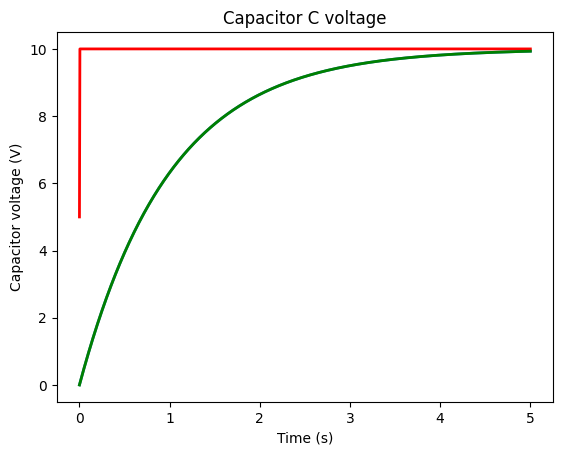

In [ ]:
import numpy as np
t = np.linspace(0, 5, 1000)
vc = cct2.C.v.evaluate(t)
from matplotlib.pyplot import figure, savefig
fig = figure()
ax = fig.add_subplot(111, title='Capacitor C voltage')
ax.plot(t, vc, linewidth=2)
ax.plot(t, cct2.V.v.evaluate(t), linewidth=2, color='red')
ax.plot(t, cct2.C.v.evaluate(t), linewidth=2, color='green')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Capacitor voltage (V)');

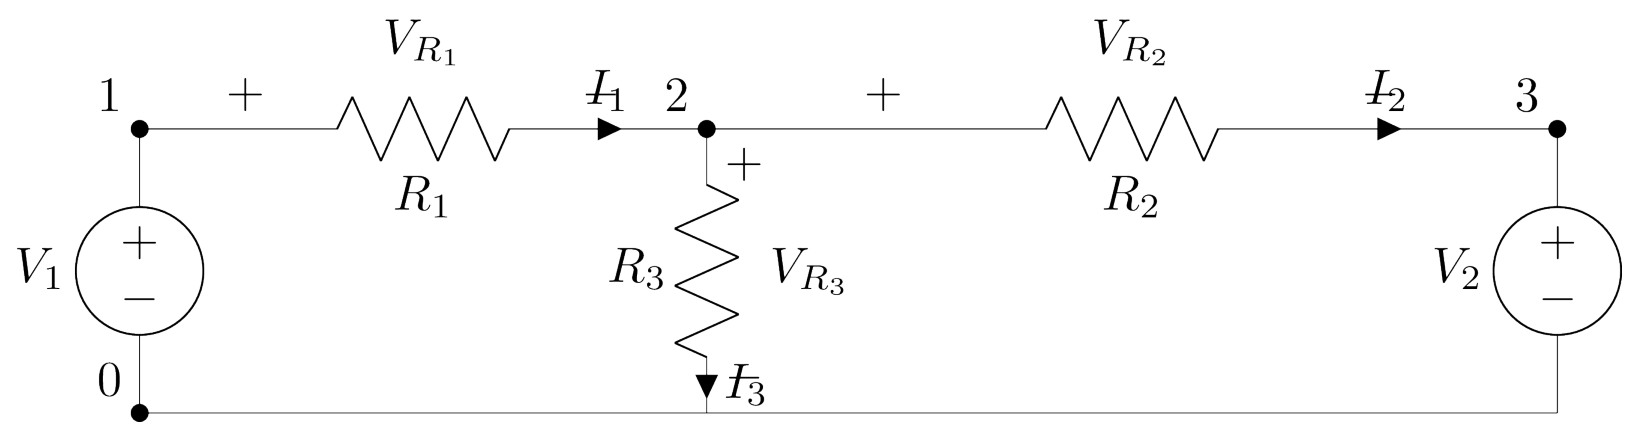

In [ ]:
from lcapy import Circuit
cct3 = Circuit("""
V1 1 0; down
R1 1 2; right=2, i=I_1, v=V_{R_1}
R2 2 3; right=3, i=I_2, v=V_{R_2}
R3 2 0_2; down, i=I_3, v=V_{R_3}
V2 3 0_3; down
W 0 0_2; right
W 0_2 0_3; right""")
cct3.draw(scale=2)

In [ ]:
l=cct3.mesh_analysis()
l.mesh_equations()

{I₁: -I₁⋅R₁ + R₃⋅(-I₁ + I₂) + V₁ = 0, I₂: -I₂⋅R₂ - R₃⋅(-I₁ + I₂) - V₂ = 0}

In [ ]:
l.matrix_equations()

                           -1      
⎡I₁⎤   ⎡-R₁ - R₃     R₃   ⎤   ⎡-V₁⎤
⎢  ⎥ = ⎢                  ⎥  ⋅⎢   ⎥
⎣I₂⎦   ⎣   R₃     -R₂ - R₃⎦   ⎣V₂ ⎦